<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/Keras_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN with Keras**

In [5]:
# ! pip install tensorflow --upgrade

In [21]:
pip install -q "tensorflow-text==2.8.*"

     - 668.6 MB 380 kB/s
     |████████████████████████████████| 5.8 MB 7.7 MB/s 
     |████████████████████████████████| 1.4 MB 72.6 MB/s 
     |████████████████████████████████| 462 kB 66.8 MB/s 


In [26]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences, sequence
from tensorflow.keras.layers import TextVectorization
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape
import tensorflow_text as tf_text
tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("colors.csv")
names = data["name"]
data.head()

,name,red,green,blue
0,18th Century Green,165,147,68
1,1975 Earth Red,123,70,59
2,1989 Miami Hotline,221,51,102
3,20000 Leagues Under the Sea,25,25,112
4,3AM in Shibuya,34,85,119


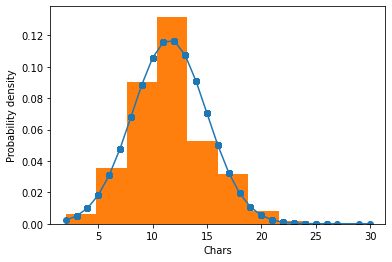

In [3]:
h = sorted(names.str.len().values)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
 
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting

plt.plot(h,fit,'-o')
plt.hist(h, density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [15]:
maxlen = 25

# vect_layer = tf.keras.layers.TextVectorization(output_mode='count', standardize='lower',
                                              #  split='character',
                                              #  voca.ulary=names)

# vect_layer.adapt(names)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
# model.add(vect_layer)

t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = pad_sequences(tokenized, maxlen=maxlen)
# print(tokenized.shape)


In [16]:
tokenized

[[54, 38, 10, 16, 3, 11, 1, 7, 10, 12, 4, 19, 3, 14, 4, 1, 1, 7],
 [54, 47, 60, 61, 3, 1, 2, 4, 10, 16, 3, 4, 1, 13],
 [54, 47, 38, 47, 3, 18, 5, 2, 18, 5, 3, 16, 8, 10, 6, 5, 7, 1],
 [48,
  37,
  37,
  37,
  37,
  3,
  6,
  1,
  2,
  14,
  12,
  1,
  9,
  3,
  12,
  7,
  13,
  1,
  4,
  3,
  10,
  16,
  1,
  3,
  9,
  1,
  2],
 [55, 2, 18, 3, 5, 7, 3, 9, 16, 5, 17, 12, 19, 2],
 [57, 37, 37, 27, 10, 3, 22, 5, 6, 18],
 [61, 29, 18, 2, 9, 10, 1, 13, 3, 15, 4, 1, 12, 74, 1, 7],
 [38, 17, 5, 10, 3, 1, 14, 14, 15, 6, 2, 7, 10],
 [47, 37, 75, 3, 11, 8, 11, 8, 2],
 [2, 3, 17, 4, 2, 7, 13, 3, 7, 1, 20, 3, 13, 2, 19],
 [2,
  3,
  11,
  1,
  4,
  10,
  2,
  5,
  7,
  3,
  9,
  16,
  2,
  13,
  1,
  3,
  8,
  22,
  3,
  14,
  4,
  1,
  1,
  7],
 [2, 3, 13, 5, 18, 1, 3, 2, 3, 13, 8, 24, 1, 7],
 [2,
  3,
  16,
  5,
  7,
  10,
  3,
  8,
  22,
  3,
  5,
  7,
  11,
  4,
  1,
  18,
  1,
  7,
  10,
  2,
  6,
  3,
  17,
  6,
  12,
  1],
 [2, 3, 15, 2, 5, 4, 3, 8, 22, 3, 17, 4, 8, 20, 7, 3, 1, 19, 1, 9],


In [17]:
print(t.word_index)

{'e': 1, 'a': 2, ' ': 3, 'r': 4, 'i': 5, 'l': 6, 'n': 7, 'o': 8, 's': 9, 't': 10, 'c': 11, 'u': 12, 'd': 13, 'g': 14, 'p': 15, 'h': 16, 'b': 17, 'm': 18, 'y': 19, 'w': 20, 'k': 21, 'f': 22, 'v': 23, 'z': 24, 'j': 25, 'q': 26, 'x': 27, "'": 28, '-': 29, 'ō': 30, 'è': 31, 'é': 32, 'ā': 33, 'á': 34, 'ó': 35, 'ū': 36, '0': 37, '8': 38, '.': 39, 'ē': 40, 'ī': 41, 'ǎ': 42, '!': 43, 'í': 44, '&': 45, 'ǜ': 46, '9': 47, '2': 48, 'à': 49, 'ǐ': 50, '’': 51, '6': 52, 'ú': 53, '1': 54, '3': 55, 'â': 56, '4': 57, 'ǔ': 58, 'ì': 59, '7': 60, '5': 61, 'ê': 62, 'ö': 63, 'ł': 64, 'š': 65, 'ü': 66, '₂': 67, 'ò': 68, 'ñ': 69, 'ě': 70, 'ń': 71, 'ä': 72, 'œ': 73, 'ß': 74, '%': 75, 'ı': 76, 'ż': 77, '/': 78, 'î': 79, 'ë': 80, '(': 81, ')': 82, 'å': 83, '$': 84, 'я': 85, 'ő': 86, 'ğ': 87, 'ç': 88, 'ù': 89}


In [19]:

one_hot_names = np_utils.to_categorical(padded_names)

In [21]:
one_hot_names.shape

(18606, 25, 90)

In [22]:
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])

In [23]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, 90)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [27]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=6,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/6
  2/466 [..............................] - ETA: 5:12 - loss: 0.0616 - acc: 0.7500ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py", line 4530, in <genexpr>
    ta.write(time, out) for ta, out in zip(output_ta_t, flat_output))  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/tf_should_use.py", line 245, in wrapped
    error_in_function=error_in_function)
466/466 [==============================] - 357s 766ms/step - loss: 0.0638 - acc: 0.6212 - val_loss: 0.0624 - val_acc: 0.6214
Epoch 2/6
466/466 [==============================] - 349s 748ms/step - loss: 0.0610 - acc: 0.6374 - val_loss: 0.0600 - val_acc: 0.6131
Epoch 3/6
466/466 [==============================] - 350s 752ms/step - loss: 0.0584 

In [30]:
# plot a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255) 

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded =pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(padded, num_classes=90)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

forest, R,G,B: 151 143 132


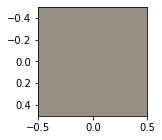

In [40]:
predict("forest")


tree, R,G,B: 134 149 126


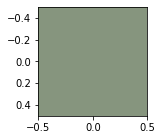

In [32]:
predict("tree")

ninja, R,G,B: 113 117 141


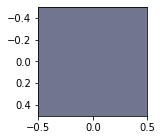

In [39]:
predict("ninja")

quarry, R,G,B: 141 135 142


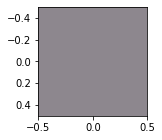

In [48]:
predict("quarry")